In [22]:
#Setting the environment:
%pip install tensorflow
%pip install scikit-learn
%pip install keras-preprocessing
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [3]:
from keras_preprocessing.sequence import pad_sequences

In [4]:
# Importing the dataset

fashion_reviews = pd.read_csv("/Users/user/Desktop/Project Submission/Implementation/Source Code/Source Code/project 2/python/prediction_101/merged_comments_with_sentiment.csv")


In [5]:
# Dataset exploration

fashion_reviews.shape

(259, 11)

In [6]:

fashion_reviews.head(5)

,comment_id,fashion_house,comment,processed_text,bert_sentiment,vader_sentiment,emoji_analysis,emotions,aspects,subjectivity,language_features
0,2,Schiaparelli,Did it again❤️👏🙌,❤ 👏 🙌,"{'positive': 0.6730619668960571, 'negative': 0...","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'sentiment': 0.6666666666666666, 'count': 3, ...","{'anger': 0.04846687614917755, 'disgust': 0.01...",{},0.0,"{'emojis': 3, 'words': 3, 'has_hashtags': Fals..."
1,22,Schiaparelli,Stunning!!!,stunning repeated,"{'positive': 0.6698260307312012, 'negative': 0...","{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'comp...","{'sentiment': 0.0, 'count': 0, 'frequencies': {}}","{'anger': 0.11644766479730606, 'disgust': 0.11...","{'aesthetic': {'score': np.float64(0.4912), 'c...",1.0,"{'emojis': 0, 'words': 2, 'has_hashtags': Fals..."
2,8,Schiaparelli,Outdid yourself 🧡🧡,outdid 🧡 🧡,"{'positive': 0.6611263751983643, 'negative': 0...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'sentiment': 0.0, 'count': 2, 'frequencies': ...","{'anger': 0.0755273625254631, 'disgust': 0.025...",{},0.0,"{'emojis': 2, 'words': 3, 'has_hashtags': Fals..."
3,132,Schiaparelli,I need a documentary on this!,need documentary,"{'positive': 0.6877944469451904, 'negative': 0...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'sentiment': 0.0, 'count': 0, 'frequencies': {}}","{'anger': 0.008433183655142784, 'disgust': 0.0...",{},0.0,"{'emojis': 0, 'words': 2, 'has_hashtags': Fals..."
4,133,Schiaparelli,We need long form Daniel Roseberry content please,need long form daniel roseberry content please,"{'positive': 0.6618634462356567, 'negative': 0...","{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...","{'sentiment': 0.0, 'count': 0, 'frequencies': {}}","{'anger': 0.003984869457781315, 'disgust': 0.0...",{},0.4,"{'emojis': 0, 'words': 7, 'has_hashtags': Fals..."


In [7]:
# Checking for missing values

fashion_reviews.isnull().values.any()

np.False_

In [8]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
df = fashion_reviews

# 1. Extract and process BERT sentiment scores
df['bert_positive_score'] = df['bert_sentiment'].apply(lambda x: eval(x)['positive'])
df['bert_negative_score'] = df['bert_sentiment'].apply(lambda x: eval(x)['negative'])

# Classify BERT sentiment: if positive > negative, assign positive, otherwise negative
df['bert_sentiment_label'] = df.apply(lambda x: 1 if x['bert_positive_score'] > x['bert_negative_score'] else 0, axis=1)

# Create separate labels for positive and negative based on thresholds
# BERT Sentiment Label Adjustments
df['bert_positive_label'] = df['bert_positive_score'].apply(lambda x: 1 if x > 0.20 else 0)  # Lower threshold
df['bert_negative_label'] = df['bert_negative_score'].apply(lambda x: 1 if x > 0.45 else 0)  # Higher threshold

# 2. Extract and process VADER sentiment scores
df['vader_positive_score'] = df['vader_sentiment'].apply(lambda x: eval(x)['pos'])
df['vader_negative_score'] = df['vader_sentiment'].apply(lambda x: eval(x)['neg'])
df['vader_compound_score'] = df['vader_sentiment'].apply(lambda x: eval(x)['compound'])

# Classify VADER sentiment: if positive > negative, assign positive, otherwise negative
df['vader_sentiment_label'] = df.apply(lambda x: 1 if x['vader_positive_score'] > x['vader_negative_score'] else 0, axis=1)

# Create separate labels for positive and negative based on thresholds
df['vader_positive_label'] = df['vader_positive_score'].apply(lambda x: 1 if x > 0.20 else 0)  # Lower threshold
df['vader_negative_label'] = df['vader_negative_score'].apply(lambda x: 1 if x > 0.25 else 0)  # Higher threshold
df['vader_compound_label'] = df['vader_compound_score'].apply(lambda x: 1 if x > 0 else 0)

# Check the updated data
df[['bert_sentiment_label', 'vader_sentiment_label']].head()


,bert_sentiment_label,vader_sentiment_label
0,1,0
1,1,1
2,1,0
3,1,0
4,1,1


/var/folders/n6/d0_6ffpd61l96h10bxlhtbjr0000gn/T/ipykernel_62720/3241710506.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bert_sentiment_label', data=df, palette='viridis')


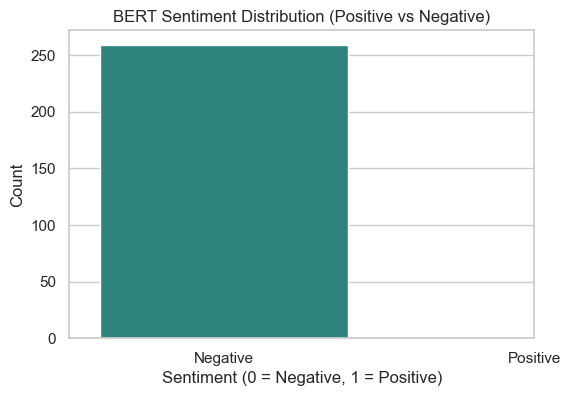

/var/folders/n6/d0_6ffpd61l96h10bxlhtbjr0000gn/T/ipykernel_62720/3241710506.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment_label', data=df, palette='plasma')


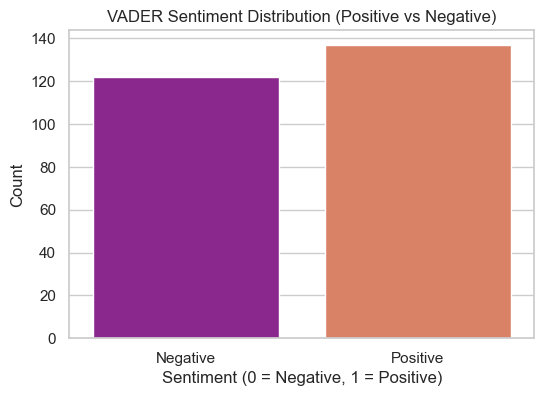

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent theme for aesthetics
sns.set(style="whitegrid")

# Plot BERT Sentiment Distribution (After Labeling)
plt.figure(figsize=(6, 4))
sns.countplot(x='bert_sentiment_label', data=df, palette='viridis')
plt.title('BERT Sentiment Distribution (Positive vs Negative)')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Custom x-axis labels
plt.show()

# Plot VADER Sentiment Distribution (After Labeling)
plt.figure(figsize=(6, 4))
sns.countplot(x='vader_sentiment_label', data=df, palette='plasma')
plt.title('VADER Sentiment Distribution (Positive vs Negative)')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Custom x-axis labels
plt.show()


In [10]:
print("Positive sentiment records:", df[df['bert_positive_label'] == 1].shape[0])
print("Negative sentiment records:", df[df['bert_negative_label'] == 0].shape[0])


Positive sentiment records: 259
Negative sentiment records: 259


In [11]:
print("Both positive and not negative:", df[(df['bert_positive_label'] == 1) & (df['bert_negative_label'] == 0)].shape[0])


Both positive and not negative: 259


In [12]:
# Create a new column combining BERT positive and negative labels
df['bert_sentiment_label'] = df.apply(
    lambda row: 1 if row['bert_positive_label'] == 1 else 0, axis=1
)


In [13]:
from sklearn.model_selection import train_test_split

# Define your features and labels
X = df['processed_text']  # This is our processed text column
y = df['bert_sentiment_label']  # Using 'bert_sentiment_label' for a more nuanced analysis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 207
Test set size: 52


In [14]:
#Preparing embedding layer
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [15]:
import io
import json

In [16]:
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [17]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

544

In [18]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [19]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/Users/user/Desktop/Prediction_101/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [20]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [21]:
embedding_matrix.shape

(544, 100)

In [22]:
#Model Training with:
#Simple Neural Network
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

/Users/user/anaconda3/envs/sentiment-env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │        54,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,400 (212.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,400 (212.50 KB)

None


In [24]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - acc: 0.5185 - loss: 0.6614 - val_acc: 0.8571 - val_loss: 0.5876
Epoch 2/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.9162 - loss: 0.5997 - val_acc: 0.9762 - val_loss: 0.5322
Epoch 3/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9694 - loss: 0.5513 - val_acc: 0.9762 - val_loss: 0.4873
Epoch 4/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9720 - loss: 0.5072 - val_acc: 0.9762 - val_loss: 0.4507
Epoch 5/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.9786 - loss: 0.4785 - val_acc: 0.9762 - val_loss: 0.4204
Epoch 6/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9786 - loss: 0.4507 - val_acc: 0.9762 - val_loss: 0.3948


In [25]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9768 - loss: 0.5015


In [26]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5131523013114929
Test Accuracy: 0.9807692170143127


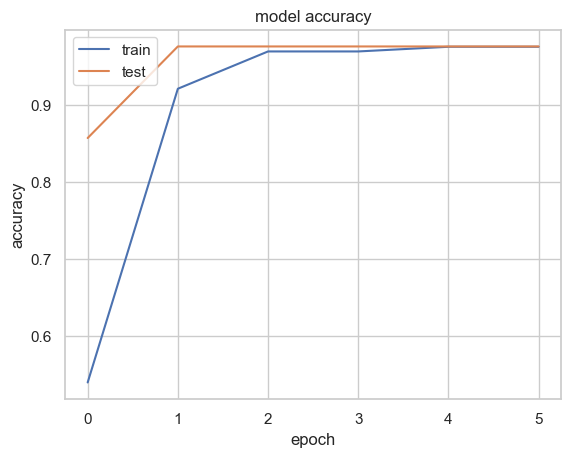

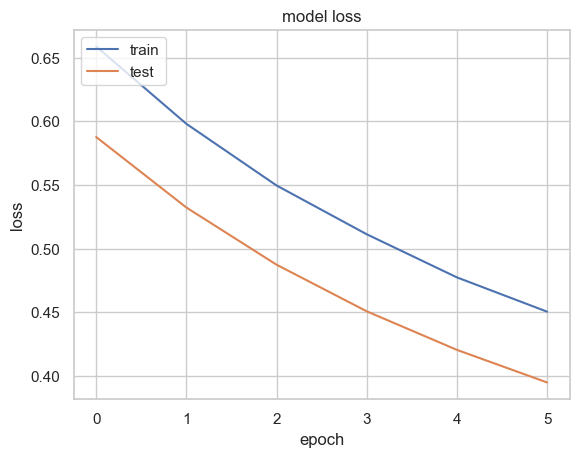

In [27]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [28]:
#Convolutional Neural Network
from keras.layers import Conv1D

In [29]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [30]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │        54,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,400 (212.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,400 (212.50 KB)

None


In [31]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - acc: 0.4803 - loss: 0.6774 - val_acc: 1.0000 - val_loss: 0.3349
Epoch 2/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - acc: 0.9934 - loss: 0.3733 - val_acc: 1.0000 - val_loss: 0.2226
Epoch 3/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - acc: 0.9934 - loss: 0.2756 - val_acc: 1.0000 - val_loss: 0.1734
Epoch 4/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.9960 - loss: 0.2322 - val_acc: 1.0000 - val_loss: 0.1462
Epoch 5/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.9934 - loss: 0.2073 - val_acc: 1.0000 - val_loss: 0.1286
Epoch 6/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.9934 - loss: 0.1882 - val_acc: 1.0000 - val_loss: 0.1164


In [32]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 1.0000 - loss: 0.2409


In [33]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.24649792909622192
Test Accuracy: 1.0


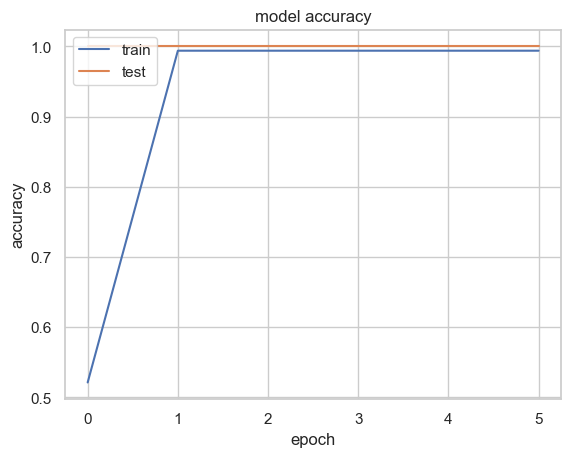

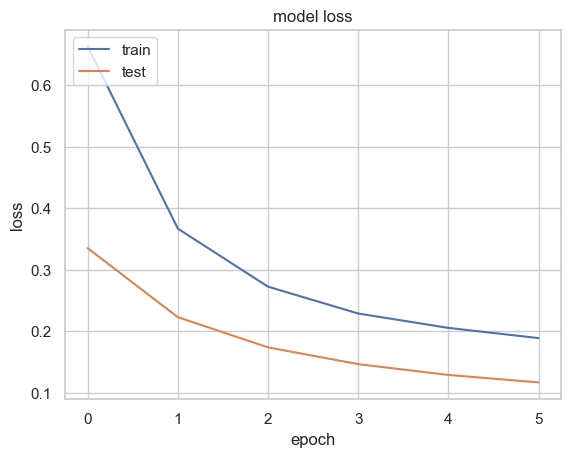

In [34]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [35]:
#Recurrent Neural Network (LSTM)
from keras.layers import LSTM

In [36]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [37]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │        54,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,400 (212.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,400 (212.50 KB)

None


In [38]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - acc: 0.1761 - loss: 0.6921 - val_acc: 1.0000 - val_loss: 0.6773
Epoch 2/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - acc: 1.0000 - loss: 0.6758 - val_acc: 1.0000 - val_loss: 0.6531
Epoch 3/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - acc: 1.0000 - loss: 0.6504 - val_acc: 1.0000 - val_loss: 0.6094
Epoch 4/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - acc: 1.0000 - loss: 0.6036 - val_acc: 1.0000 - val_loss: 0.5052
Epoch 5/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - acc: 1.0000 - loss: 0.4857 - val_acc: 1.0000 - val_loss: 0.1148
Epoch 6/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - acc: 1.0000 - loss: 0.0995 - val_acc: 1.0000 - val_loss: 0.0020


In [39]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 1.0000 - loss: 0.0020


In [40]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0019721516873687506
Test Accuracy: 1.0


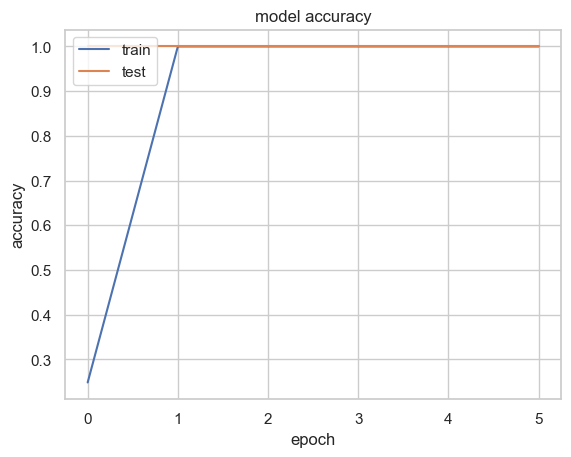

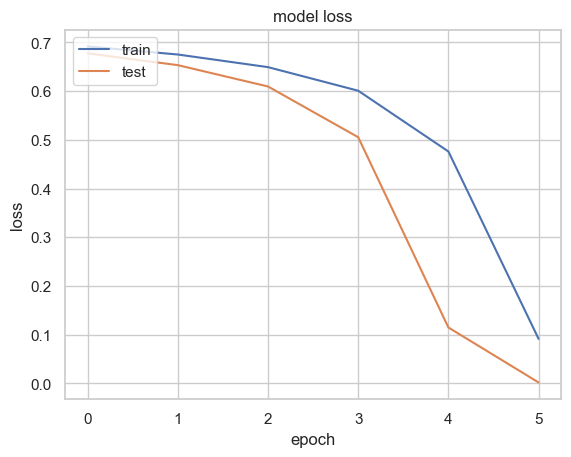

In [41]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [42]:

score = snn_model.evaluate(X_test, y_test, verbose=1)
score = cnn_model.evaluate(X_test, y_test, verbose=1)
score = lstm_model.evaluate(X_test, y_test, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9768 - loss: 0.5015
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 1.0000 - loss: 0.2409
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 1.0000 - loss: 0.0020
